In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crosssellprediction/sample_submission_iA3afxn.csv
/kaggle/input/crosssellprediction/train.csv_VsW9EGx/train.csv
/kaggle/input/crosssellprediction/test.csv_yAFwdy2/test.csv


In [4]:
train=pd.read_csv("../input/crosssellprediction/train.csv_VsW9EGx/train.csv")

In [5]:
test=pd.read_csv("../input/crosssellprediction/test.csv_yAFwdy2/test.csv")

In [6]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [8]:
train.shape

(381109, 12)

In [9]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
train_copy=train.copy()

In [11]:
train_copy.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
test_copy=test.copy()

In [13]:
train_copy.drop(['id'],axis=1,inplace=True)

In [14]:
test_copy.drop(['id'],axis=1,inplace=True)

In [15]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [16]:
train_copy['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [17]:
train_copy['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [18]:
train_copy['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [19]:
col=[]
for c in train_copy.columns:
    if train_copy[c].dtype=='object':
        col.append(c)

In [20]:
col

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [21]:
train_encode=pd.get_dummies(train_copy,columns=col,dtype='uint8')

In [22]:
test_encode=pd.get_dummies(test_copy,columns=col,dtype='uint8')

In [23]:
train_encode.shape

(381109, 15)

In [24]:
test_encode.shape

(127037, 14)

In [25]:
train_encode.isnull().sum()

Age                      0
Driving_License          0
Region_Code              0
Previously_Insured       0
Annual_Premium           0
Policy_Sales_Channel     0
Vintage                  0
Response                 0
Gender_Female            0
Gender_Male              0
Vehicle_Age_1-2 Year     0
Vehicle_Age_< 1 Year     0
Vehicle_Age_> 2 Years    0
Vehicle_Damage_No        0
Vehicle_Damage_Yes       0
dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()

In [28]:
y=train_encode['Response']

In [29]:
X=train_encode.drop(['Response'],axis=1)

In [30]:
from collections import Counter

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 334399, 1: 46710})
Resampple dataset shape: Counter({1: 334399, 0: 334399})


In [32]:
x_smote.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,0,1,0,0,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,1,0,0,1,0
2,47,1,28.0,0,38294.0,26.0,27,0,1,0,0,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,0,1,0,1,0
4,29,1,41.0,1,27496.0,152.0,39,1,0,0,1,0,1,0


In [33]:
columns=x_smote.columns
ind=x_smote.index

In [34]:
colm=test_encode.columns
indx=test_encode.index

In [35]:
x_smote=sc.fit_transform(x_smote)

In [36]:
test_encode=sc.fit_transform(test_encode)

In [37]:
x_smote=pd.DataFrame(x_smote,columns=columns,index=ind)

In [38]:
test_encode=pd.DataFrame(test_encode,columns=colm,index=indx)

In [39]:
x_smote.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0.250152,0.044165,0.115056,-0.594469,0.529726,-1.389191,0.755615,-0.699459,1.060754,-1.115315,-0.610045,5.591829,-0.627590,0.653306
1,2.575582,0.044165,-1.960228,-0.594469,0.141515,-1.389191,0.346782,-0.699459,1.060754,0.896608,-0.610045,-0.178832,1.593397,-1.530676
2,0.468161,0.044165,0.115056,-0.594469,0.408515,-1.389191,-1.529039,-0.699459,1.060754,-1.115315,-0.610045,5.591829,-0.627590,0.653306
3,-1.421250,0.044165,-1.296137,1.682175,-0.134408,0.877428,0.587272,-0.699459,1.060754,-1.115315,1.639223,-0.178832,1.593397,-1.530676
4,-0.839892,0.044165,1.194204,1.682175,-0.197426,0.877428,-1.384745,1.429677,-0.942726,-1.115315,1.639223,-0.178832,1.593397,-1.530676


In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport
from sklearn.feature_selection import RFECV
import operator
import warnings
warnings.simplefilter(action = "ignore")

In [41]:
kf = KFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x_smote,y_smote):
    xtr,xvl = x_smote.iloc[train_index],x_smote.iloc[test_index]
    ytr,yvl = y_smote.iloc[train_index],y_smote.iloc[test_index]

In [42]:
# Tum modellerin train validasyon skorları

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []

In [43]:
def metrics(true,predicted):
    return roc_auc_score(true,predicted)

In [45]:
import matplotlib.pyplot as plt

LR: 0.847430 
KNN: 0.868308 
CART: 0.892918 
RF: 0.903926 
XGB: 0.867038 
LightGBM: 0.895080 


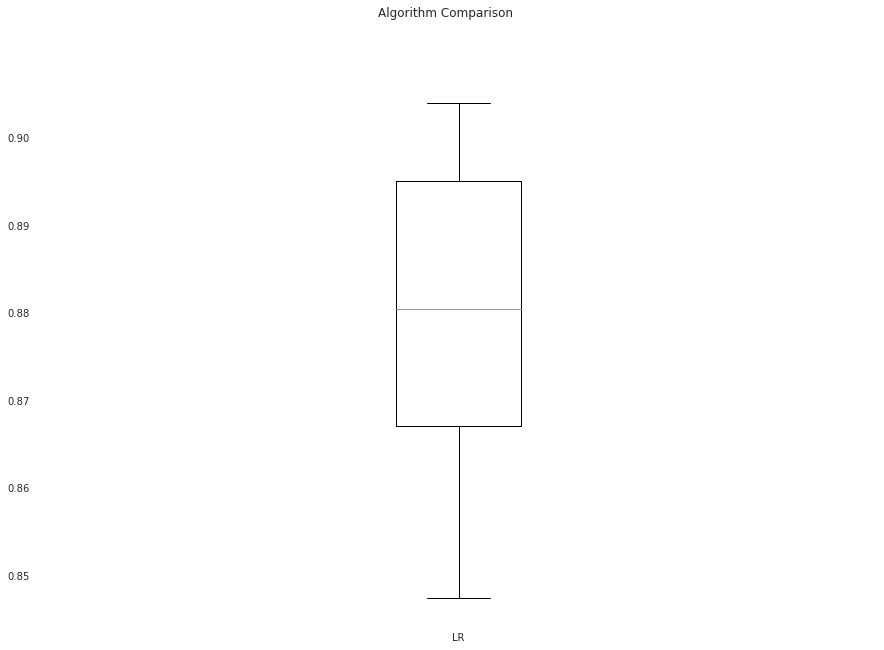

In [46]:
for name, model in models:
    
        model.fit(xtr,ytr)
        pred=model.predict(xvl)
        res=metrics(yvl,pred)
        results.append(res)
        names.append(name)
        msg = "%s: %f " % (name,res)
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [47]:
mod=DecisionTreeClassifier(random_state=42)

In [48]:
from sklearn.linear_model import SGDClassifier

In [49]:
model=SGDClassifier(random_state=42)

In [50]:
from sklearn.linear_model import SGDClassifier
model1 = SGDClassifier(loss="hinge", penalty="l2")

In [51]:
model1.fit(xtr,ytr)

SGDClassifier()

In [52]:
model1.score(xvl, yvl)

0.8349942807586779

In [53]:
pre=model1.predict(xvl)

In [54]:
metrics(yvl,pre)

0.8345373928668735

In [55]:
pred=model1.predict(test_encode)

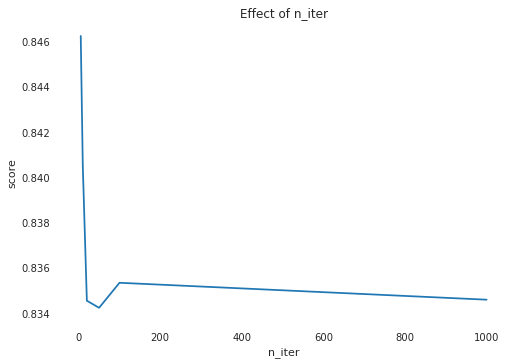

In [56]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(xtr, ytr)
    scores.append(model.score(xvl, yvl))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

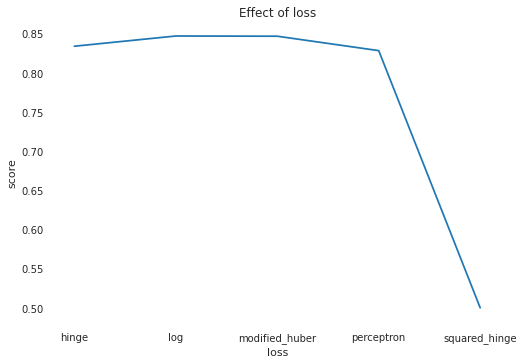

In [57]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    model = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    model.fit(xtr, ytr)
    predo=model.predict(xvl)
    scores.append(metrics(yvl,predo))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores)

In [58]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params)

In [81]:
pre=model1.predict(xvl)

In [82]:
metrics(yvl,pre)

0.8345373928668735

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
m=GaussianNB()

In [62]:
m.fit(xtr,ytr)

GaussianNB()

In [63]:
pr=m.predict_proba(xvl)

In [64]:
pr=pr[:,1]

In [65]:
pr

array([0.64241491, 0.        , 0.        , ..., 0.99997755, 0.99998421,
       0.99987514])

In [66]:
metrics(yvl,pr)

0.8738766345063202

In [67]:
res=m.predict_proba(test_encode)[:,1]

In [68]:
mod.fit(xtr,ytr)

DecisionTreeClassifier(random_state=42)

In [69]:
predicted=mod.predict(xvl)

In [70]:
metrics(yvl,predicted)

0.893142527922067

In [71]:
pred=mod.predict(test_encode)

In [72]:
test_ox=test.copy()

In [73]:
test_ox['Response']=res

In [74]:
pd.DataFrame(test_ox, columns=['id','Response']).to_csv('nb_tweak.csv',mode = 'w', index=False)

In [75]:
model2=LGBMClassifier()

In [76]:
model2.fit(xtr,ytr)

LGBMClassifier()

In [77]:
pred_lgbm=model2.predict_proba(xvl)[:,1]

In [78]:
pred_lgbm

array([7.51111824e-02, 6.10072610e-04, 6.33555054e-04, ...,
       9.97083233e-01, 9.34331388e-01, 9.98065037e-01])

In [79]:
metrics(yvl,pred_lgbm)

0.9716785540932187

In [80]:
pred_test_lgbm=model2.predict_proba(test_encode)[:,1]

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# sklearn tools for model training and assesment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'metric_freq': 1,
    'is_training_metric': True,
    'max_bin': 255,
    'learning_rate': 0.1,
    'num_leaves': 63,
    'tree_learner': 'serial',
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf': 50,
    'min_sum_hessian_in_leaf': 5,
    'is_enable_sparse': True,
    'use_two_round_loading': False,
    'is_save_binary_file': False,
    'output_model': 'LightGBM_model.txt',
    'num_machines': 1,
    'local_listen_port': 12400,
    'machine_list_file': 'mlist.txt',
    'verbose': 0,
    'subsample_for_bin': 200000,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0
}


lgb_train = lgb.Dataset(xtr, ytr)
lgb_eval = lgb.Dataset(xvl, yvl, reference=lgb_train)

# train
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval)

gridParams = {
    'learning_rate': [ 0.1],
    'num_leaves': [63],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary']
}

mdl = lgb.LGBMClassifier(
    task = params['task'],
    metric = params['metric'],
    metric_freq = params['metric_freq'],
    is_training_metric = params['is_training_metric'],
    max_bin = params['max_bin'],
    tree_learner = params['tree_learner'],
    feature_fraction = params['feature_fraction'],
    bagging_fraction = params['bagging_fraction'],
    bagging_freq = params['bagging_freq'],
    min_data_in_leaf = params['min_data_in_leaf'],
    min_sum_hessian_in_leaf = params['min_sum_hessian_in_leaf'],
    is_enable_sparse = params['is_enable_sparse'],
    use_two_round_loading = params['use_two_round_loading'],
    is_save_binary_file = params['is_save_binary_file'],
    n_jobs = -1
)

scoring = {'AUC': 'roc_auc'}

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=5, scoring=scoring, n_jobs=-1, refit='AUC')
# Run the grid
grid.fit(xtr, ytr)

print(grid.best_params_)
print(grid.best_score_)